In [1]:
import sys
from tqdm import trange
from utils import *
from mirror_prox import *
from paus import *

## (25, 25) matrix

In [2]:
k = 5 # grid size
n = k * k # amount of houses
distance_matrix = get_distance_matrix(make_house_grid(k))
theta = 2 / distance_matrix.max()

In [3]:
matrices_array = [get_utility_matrix(distance_matrix) for _ in range(10000)]
mean_matrix = np.mean(matrices_array, axis=0)

In [7]:
machine_1 = matrices_array[:2000]
machine_2 = matrices_array[2000:4000]
machine_3 = matrices_array[4000:6000]
machine_4 = matrices_array[6000:8000]
machine_5 = matrices_array[8000:]

In [8]:
A_1 = np.mean(machine_1, axis=0)
A_2 = np.mean(machine_2, axis=0)
A_3 = np.mean(machine_3, axis=0)
A_4 = np.mean(machine_4, axis=0)
A_5 = np.mean(machine_5, axis=0)

In [18]:
delta = np.linalg.norm(get_hess(mean_matrix) - get_hess(A_1), ord=1)
Lipschitz = np.linalg.norm(A_1, ord=1)
gamma_sim = 1 / (2 * Lipschitz * delta) 

In [51]:
def run(c_list: list):
    for c in c_list:
        ans_breg, error_breg = PAUS_method(grad_x, grad_y, prox_simplex, gamma_MP, c, n, Lipschitz, gamma_sim, A_1, mean_matrix)
        ans_mp, error_mp = MirrorProx(grad_x, grad_y, prox_simplex, gamma_MP, c, n, Lipschitz, mean_matrix)
        x = np.array(range(len(error_breg))) * iter_grad_calls
        plt.plot(x, error_breg, label = r'PAUS $\gamma=\dfrac{%.1f}{L}$' %c)
        plt.plot(x, error_mp, label = r'Mirror Prox $\gamma=\dfrac{%.1f}{L}$' %c)
        continue
    plt.title("PAUS and Mirror Prox", fontsize=20)
    plt.xlabel("communications", fontsize=20)
    plt.ylabel("duality gap", fontsize=20)
    plt.legend()
    plt.grid()
    plt.show()

In [52]:
def run_log(c_list: list):
    for c in c_list:
        ans_breg, error_breg = PAUS_method(grad_x, grad_y, prox_simplex, gamma_MP, c, n, Lipschitz, gamma_sim, A_1, mean_matrix)
        ans_mp, error_mp = MirrorProx(grad_x, grad_y, prox_simplex, gamma_MP, c, n, Lipschitz, mean_matrix)
        x = np.array(range(len(error_breg))) * iter_grad_calls
        plt.loglog(x, error_breg, label = r'PAUS $\gamma=\dfrac{%.1f}{L}$' %c)
        plt.loglog(x, error_mp, label = r'Mirror Prox $\gamma=\dfrac{%.1f}{L}$' %c)
        continue
    plt.title("PAUS and Mirror Prox", fontsize=20)
    plt.xlabel("communications", fontsize=20)
    plt.ylabel("duality gap", fontsize=20)
    plt.legend()
    plt.grid()
    plt.show()

In [42]:
def runner(c_list: list[int], max_iter=4 * 10**3):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 7), dpi=300)
    fig.subplots_adjust(hspace=0.7)
    iter_grad_calls = 4
    for c in c_list:
        ans_breg, error_breg = PAUS_method(grad_x, grad_y, prox_simplex, gamma_MP, c, n, Lipschitz, gamma_sim, A_1, mean_matrix, max_iter=max_iter)
        ans_mp, error_mp = MirrorProx(grad_x, grad_y, prox_simplex, gamma_MP, c, n, Lipschitz, mean_matrix, max_iter=max_iter)
        x = np.array(range(len(error_breg))) * iter_grad_calls 
        ax1.plot(x, error_breg, label = r'PAUS $\gamma=\dfrac{%.1f}{L}$' %c)
        ax1.plot(x, error_mp, label = r'Mirror Prox $\gamma=\dfrac{%.1f}{L}$' %c)
        continue

    ax1.set_title("PAUS and Mirror Prox", fontsize=20)
    ax1.set_xlabel("communications", fontsize=20)
    ax1.set_ylabel("duality gap", fontsize=20)
    ax1.set_yscale("log")
    ax1.legend()
    ax1.grid()
    ax1.plot()

    x = np.array(range(len(error_breg))) * iter_grad_calls
    ax2.set_title("PAUS and Mirror Prox", fontsize=20)
    ax2.loglog(x, error_breg, label = r'PAUS $\gamma=\dfrac{%.1f}{L}$' %c)
    ax2.loglog(x, error_mp, label = r'Mirror Prox $\gamma=\dfrac{%.1f}{L}$' %c)
    ax2.set_xlabel("communications", fontsize=20)
    ax2.set_ylabel("duality gap", fontsize=20)
    ax2.legend()
    ax2.grid()
    ax2.plot()

100%|████████████████████████████████████| 10000/10000 [00:29<00:00, 342.90it/s]


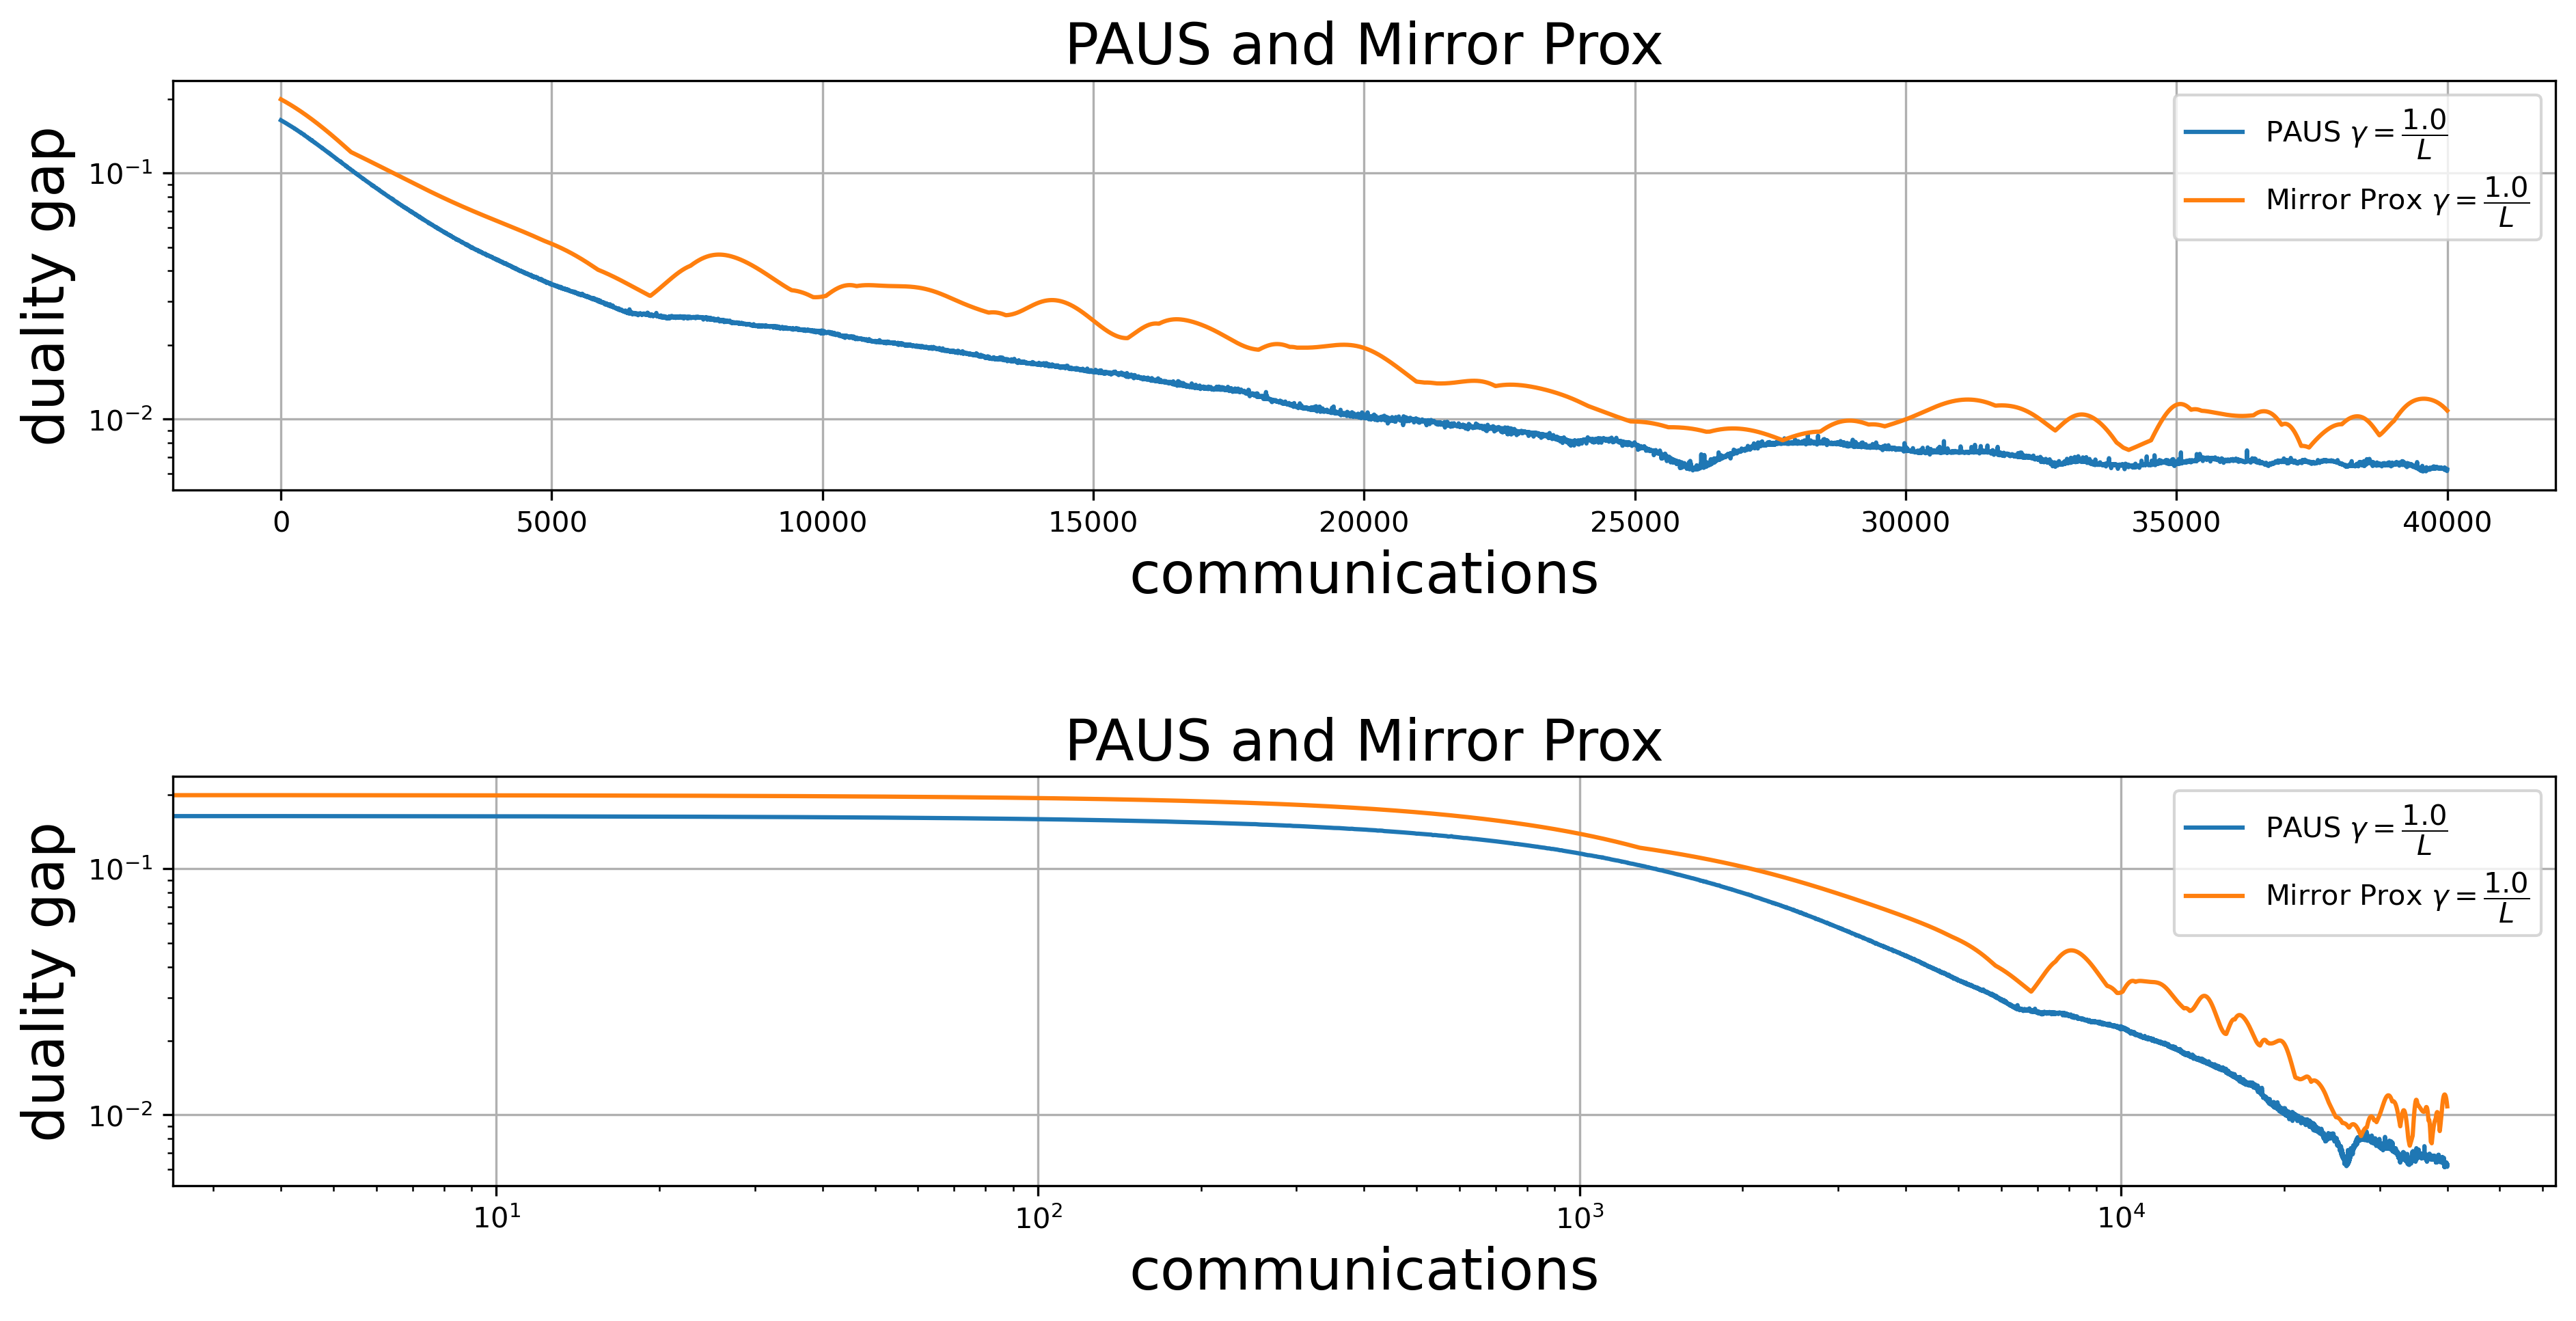

In [44]:
runner([1], max_iter=10000)

100%|██████████████████████████████████████| 4000/4000 [00:04<00:00, 832.01it/s]


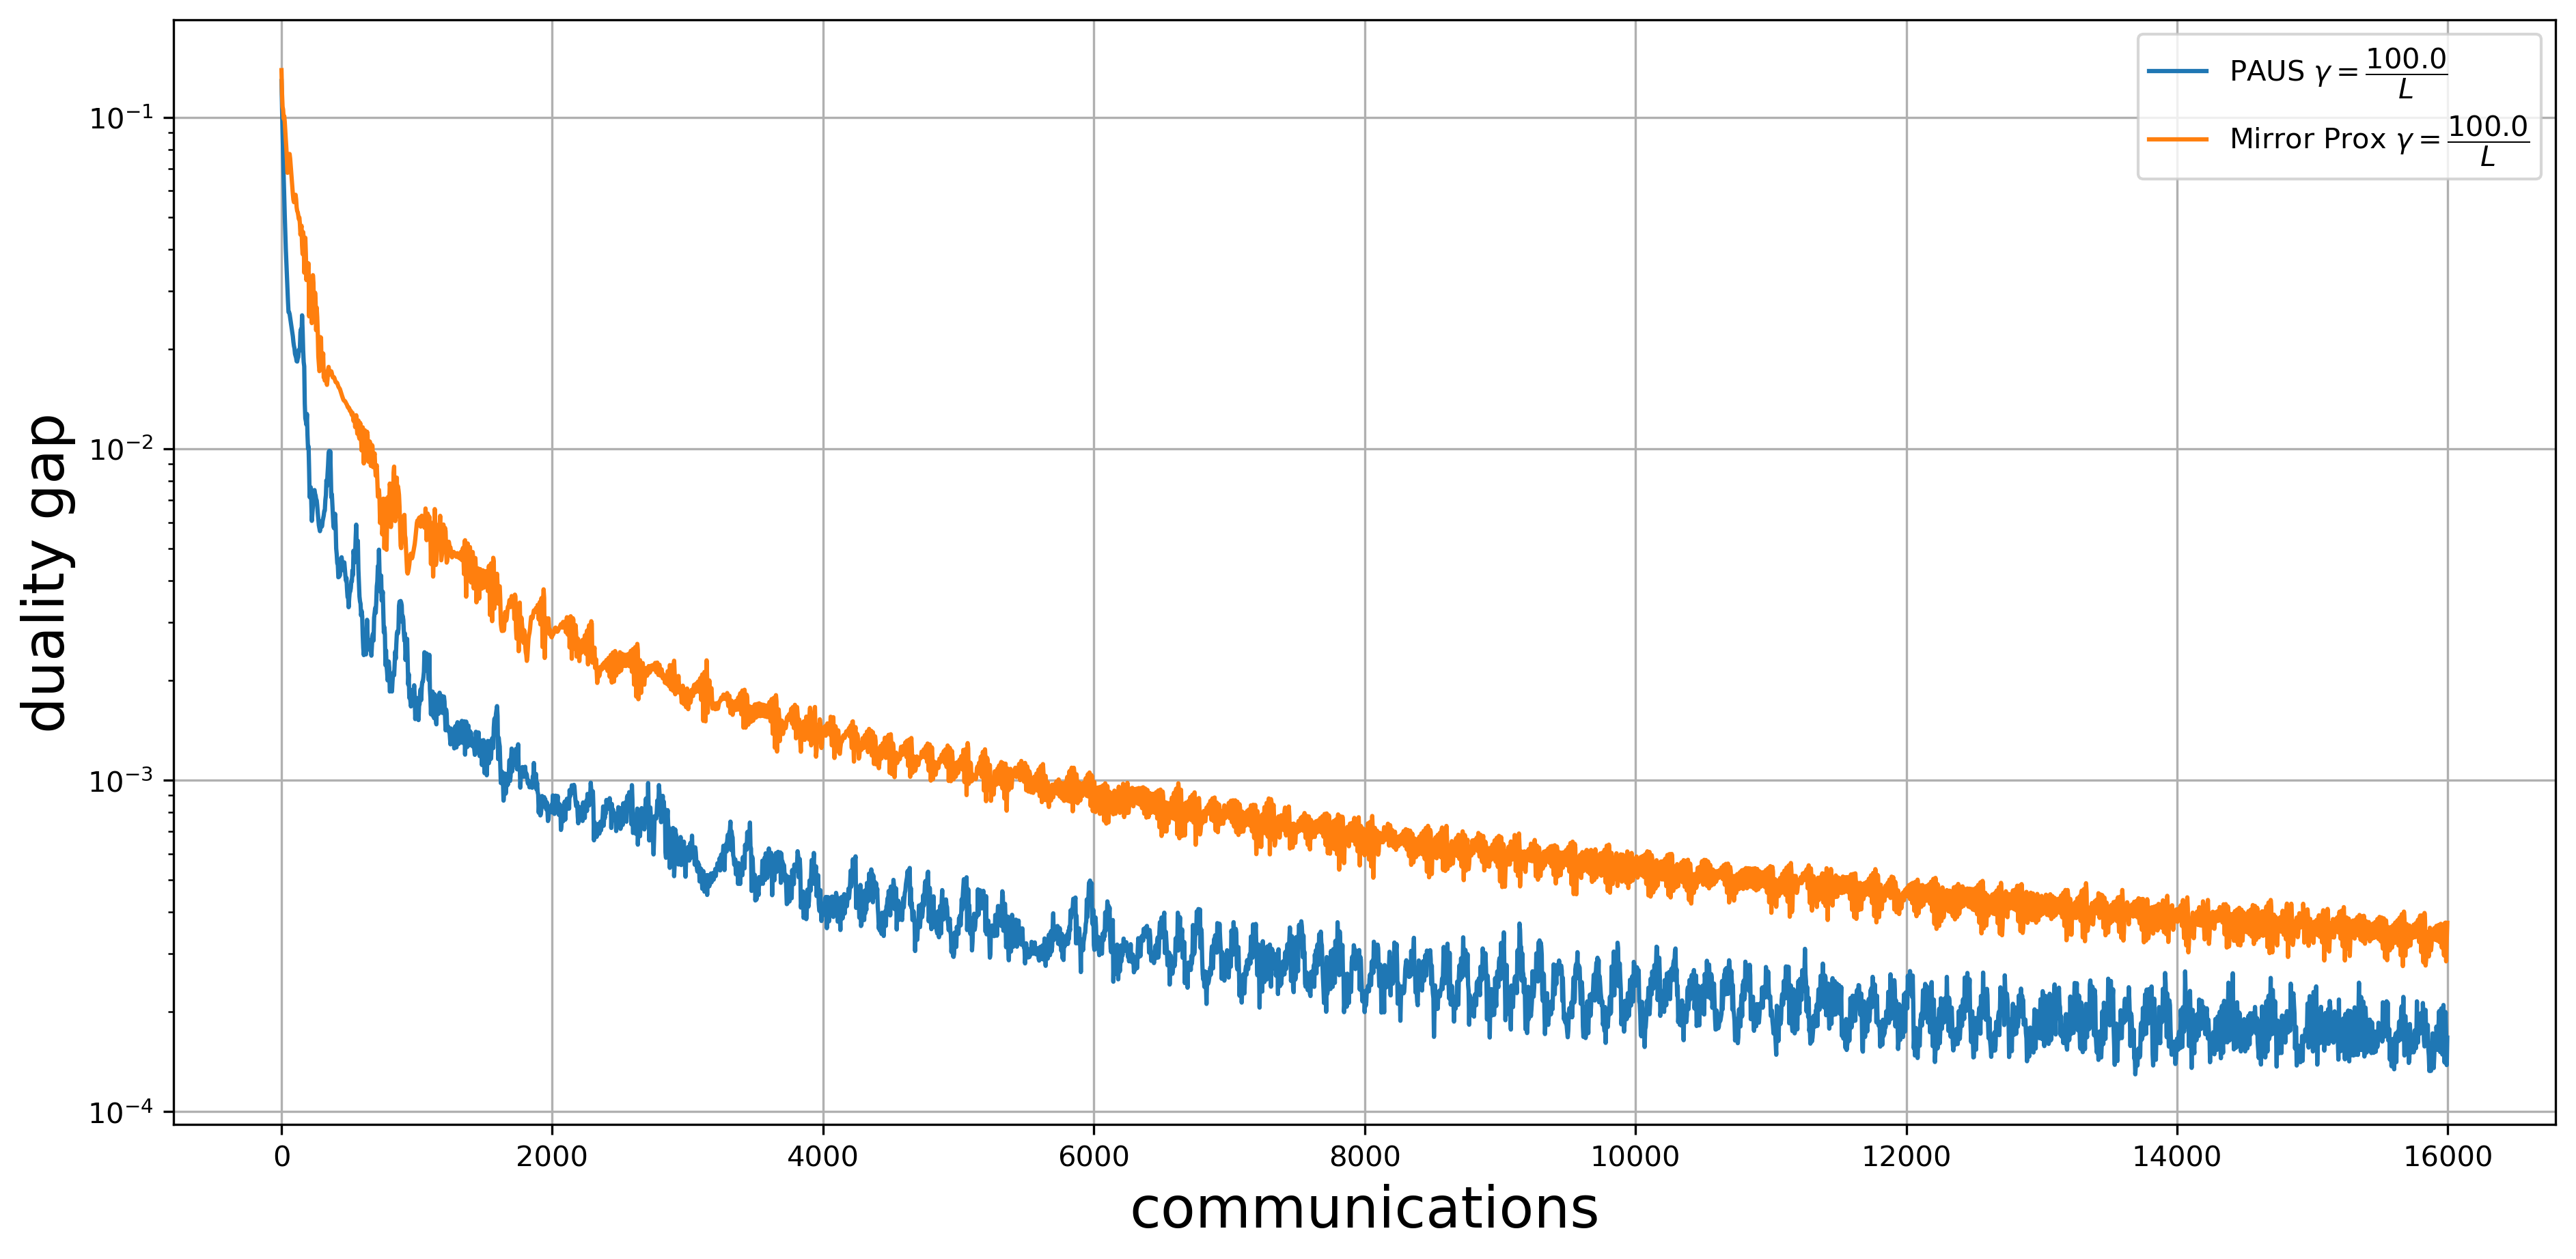

In [45]:
fig = plt.figure(figsize = (15, 7), dpi=300)
iter_grad_calls = 4
for c in [100]:
    ans_breg, error_breg = PAUS_method(grad_x, grad_y, prox_simplex, gamma_MP, c, n, Lipschitz, gamma_sim, A_1, mean_matrix)
    ans_mp, error_mp = MirrorProx(grad_x, grad_y, prox_simplex, gamma_MP, c, n, Lipschitz, mean_matrix)
    x = np.array(range(len(error_breg))) * iter_grad_calls 
    plt.plot(x, error_breg, label = r'PAUS $\gamma=\dfrac{%.1f}{L}$' %c)
    plt.plot(x, error_mp, label = r'Mirror Prox $\gamma=\dfrac{%.1f}{L}$' %c)
    continue

plt.xlabel("communications", fontsize=20)
plt.ylabel("duality gap", fontsize=20)
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()

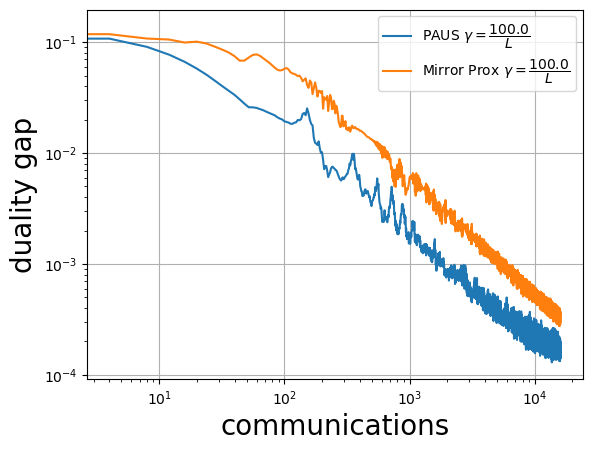

In [47]:
x = np.array(range(len(error_breg))) * iter_grad_calls 
plt.loglog(x, error_breg, label = r'PAUS $\gamma=\dfrac{%.1f}{L}$' %c)
plt.loglog(x, error_mp, label = r'Mirror Prox $\gamma=\dfrac{%.1f}{L}$' %c)
plt.xlabel("communications", fontsize=20)
plt.ylabel("duality gap", fontsize=20)
plt.legend()
plt.grid()
plt.show()

100%|██████████████████████████████████████| 4000/4000 [00:04<00:00, 870.29it/s]


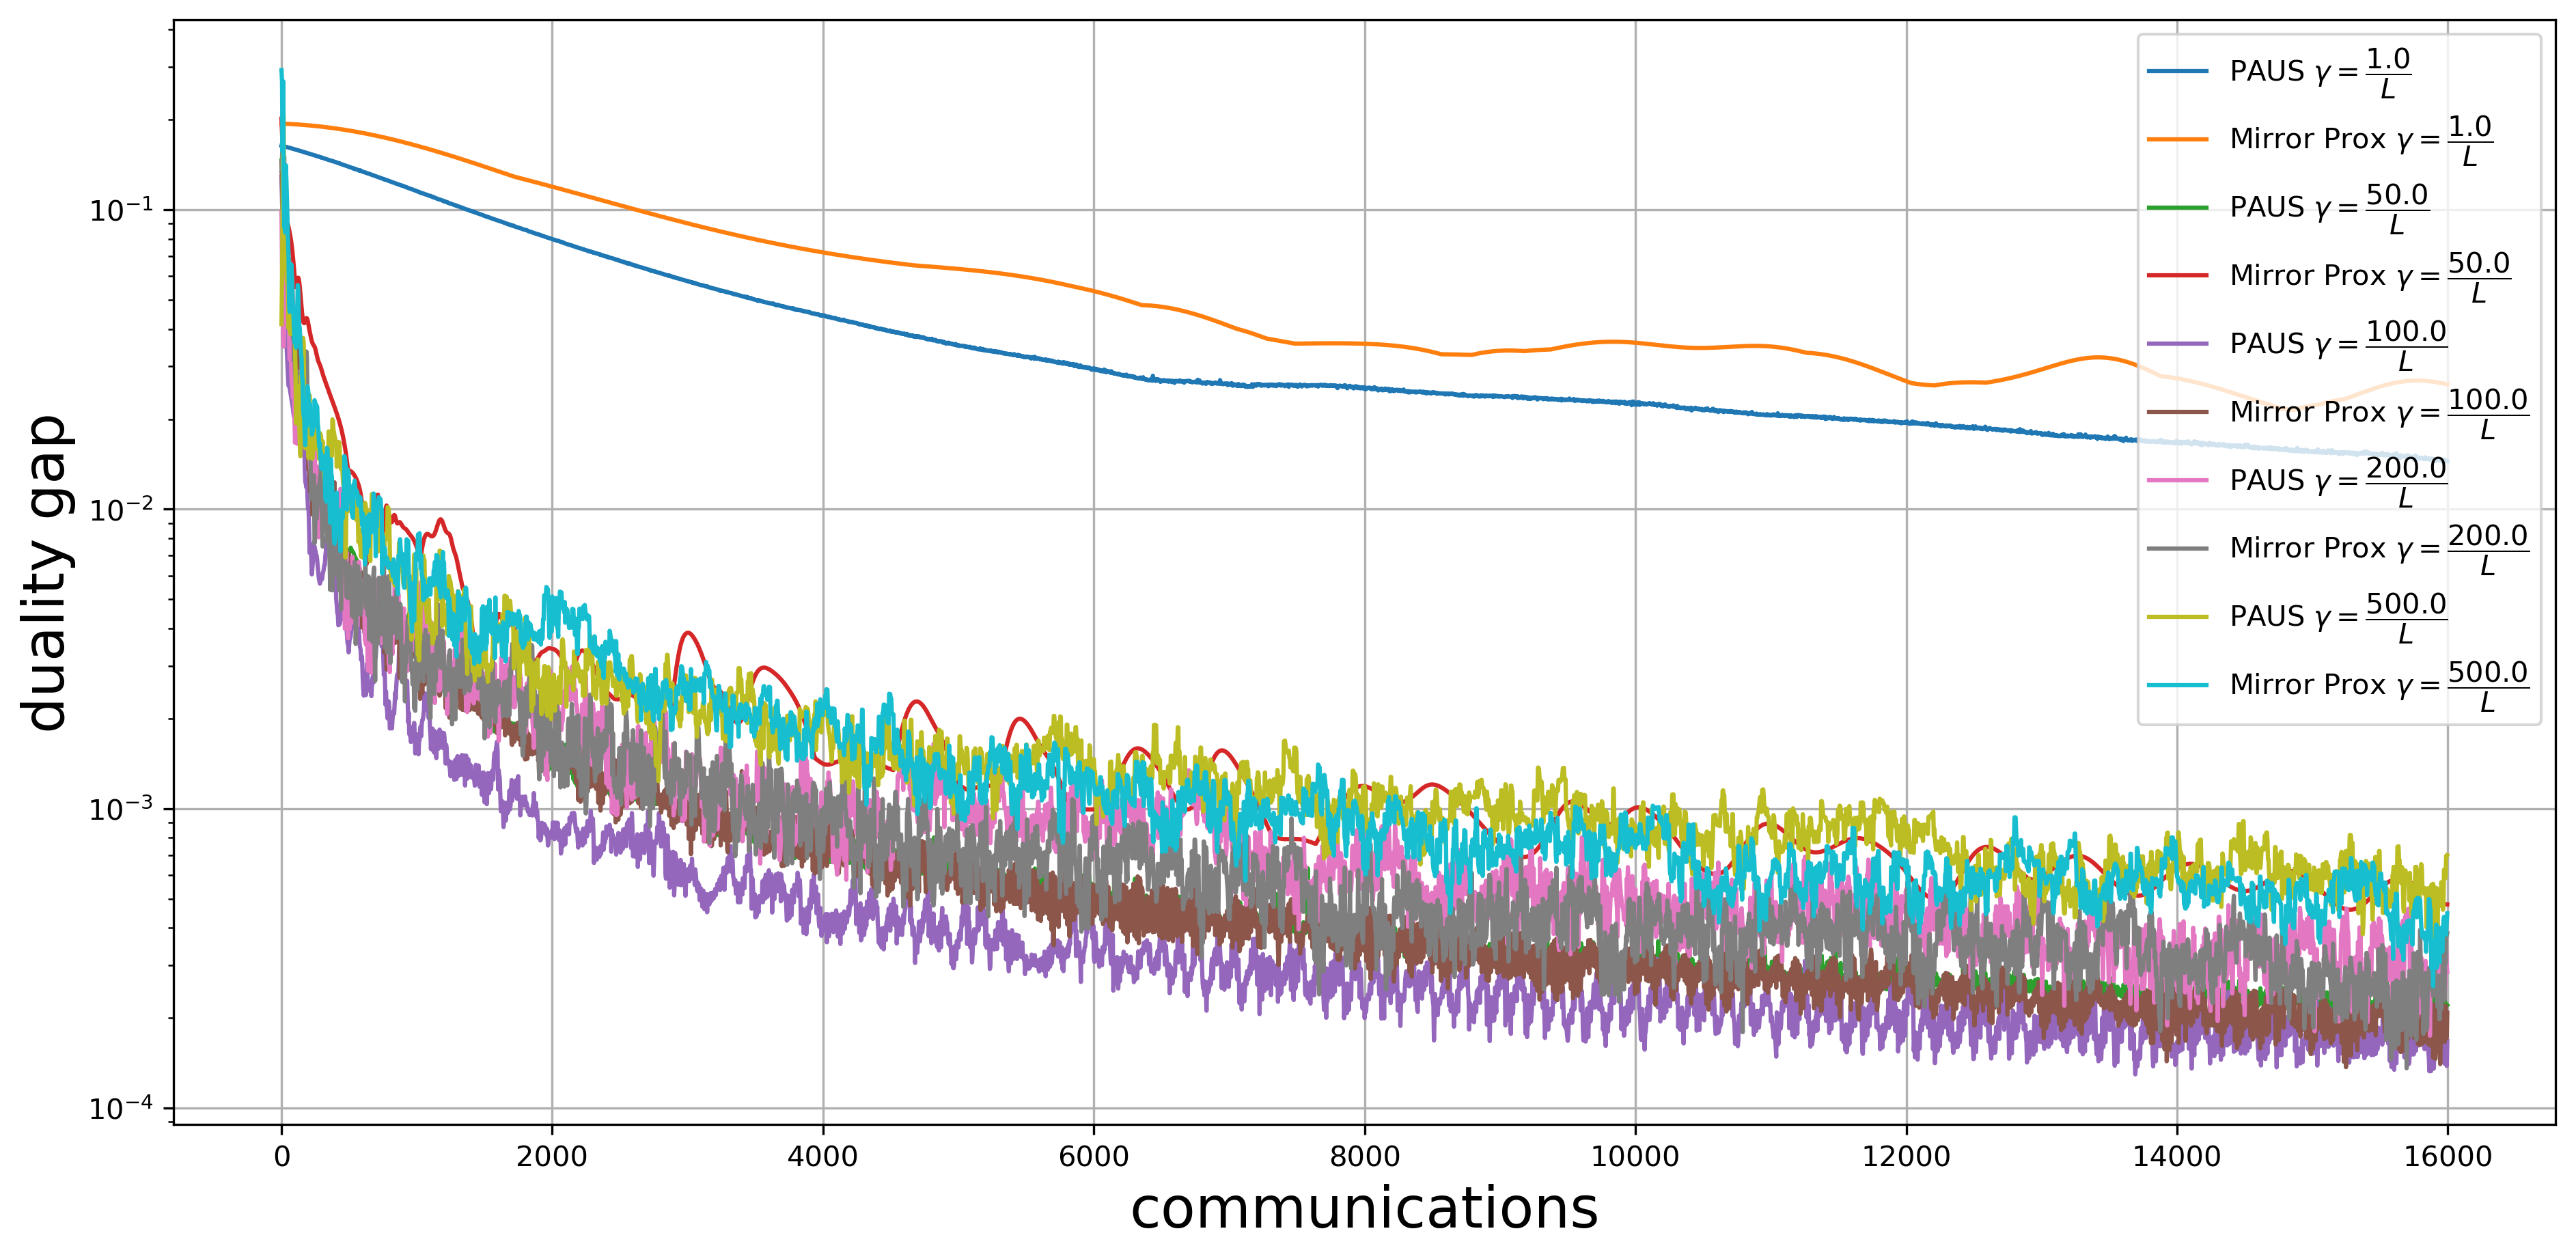

In [20]:
fig = plt.figure(figsize = (15, 7), dpi=300)
iter_grad_calls = 4
for c in [1, 50, 100, 200, 500]:
    ans_breg, error_breg = PAUS_method(grad_x, grad_y, prox_simplex, gamma_MP, c, n, Lipschitz, gamma_sim, A_1, mean_matrix)
    ans_mp, error_mp = MirrorProx(grad_x, grad_y, prox_simplex, gamma_MP, c, n, Lipschitz, mean_matrix)
    x = np.array(range(len(error_breg))) * iter_grad_calls 
    plt.plot(x, error_breg, label = r'PAUS $\gamma=\dfrac{%.1f}{L}$' %c)
    plt.plot(x, error_mp, label = r'Mirror Prox $\gamma=\dfrac{%.1f}{L}$' %c)
    continue

plt.xlabel("communications", fontsize=20)
plt.ylabel("duality gap", fontsize=20)
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()

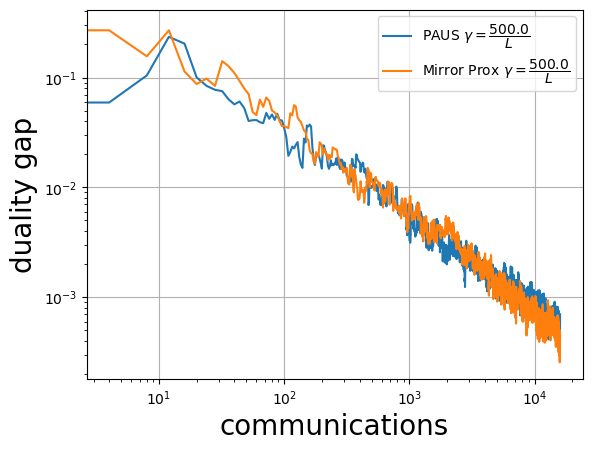

In [21]:
x = np.array(range(len(error_breg))) * iter_grad_calls 
plt.loglog(x, error_breg, label = r'PAUS $\gamma=\dfrac{%.1f}{L}$' %c)
plt.loglog(x, error_mp, label = r'Mirror Prox $\gamma=\dfrac{%.1f}{L}$' %c)
plt.xlabel("communications", fontsize=20)
plt.ylabel("duality gap", fontsize=20)
plt.legend()
plt.grid()
plt.show()

100%|██████████████████████████████████████| 4000/4000 [00:04<00:00, 838.49it/s]


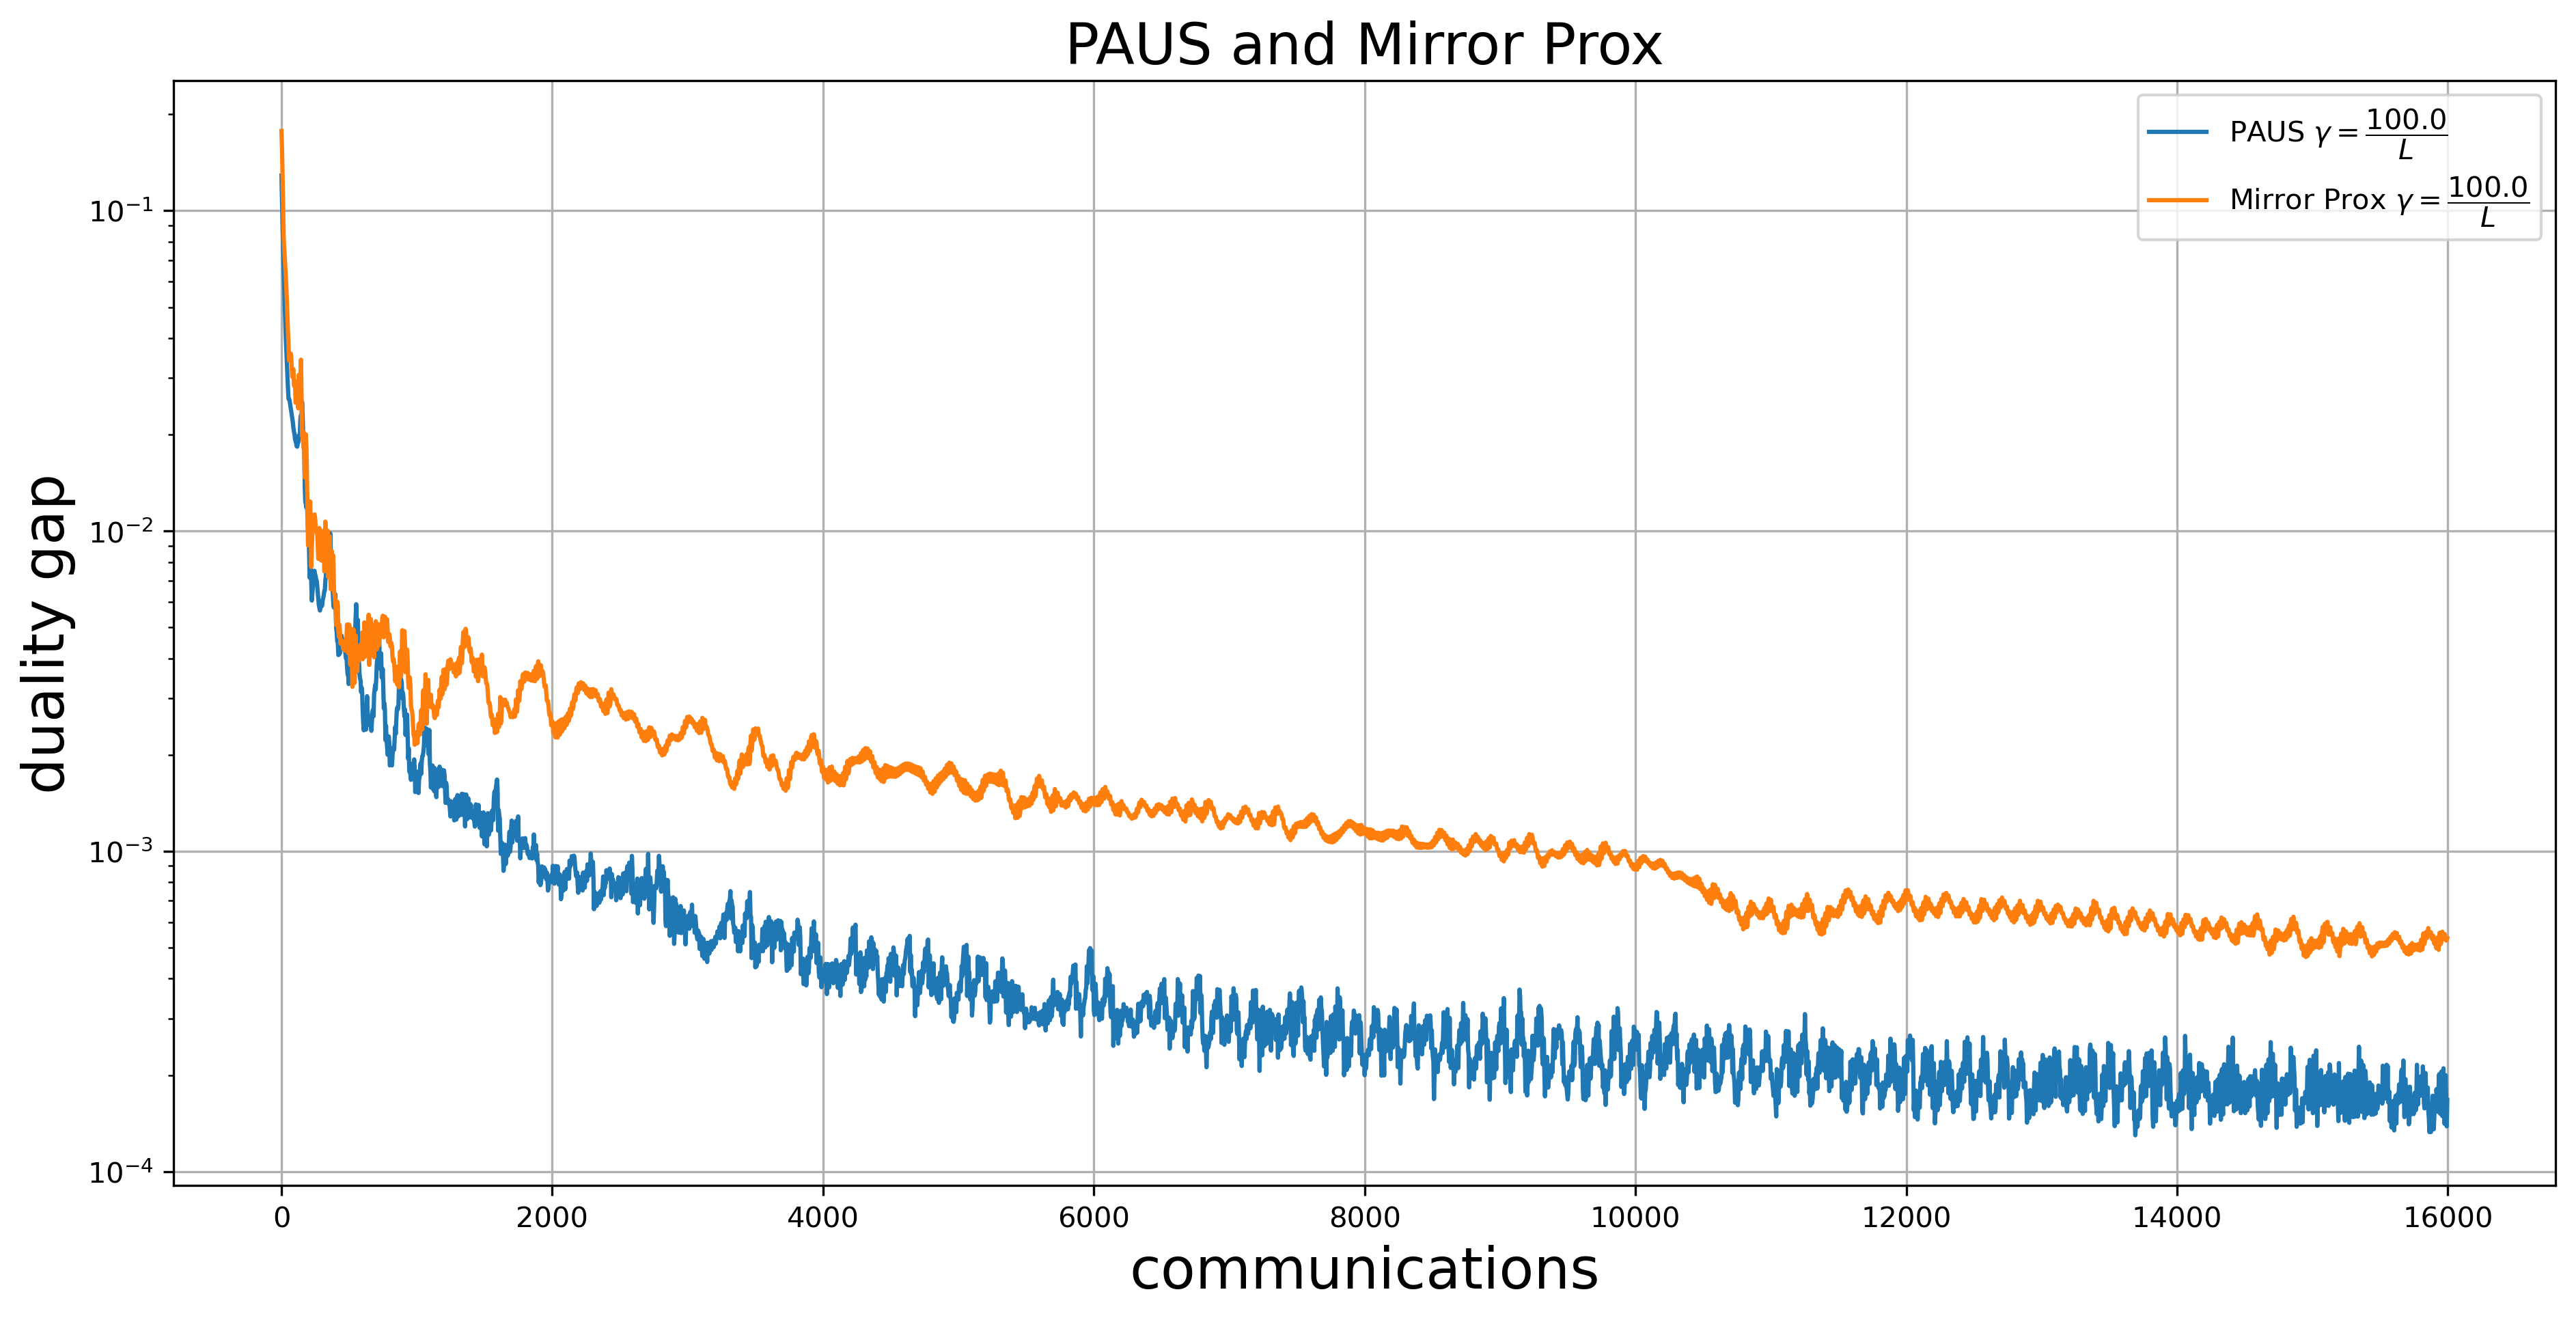

In [53]:
fig = plt.figure(figsize = (15, 7), dpi=300)
iter_grad_calls = 4
for c in [100]:
    ans_breg, error_breg = PAUS_method(grad_x, grad_y, prox_simplex, gamma_MP, c, n, Lipschitz, gamma_sim, A_1, mean_matrix)
    ans_mp, error_mp = MirrorProx(grad_x, grad_y, prox_simplex, gamma_MP, c, n, Lipschitz, mean_matrix)
    x = np.array(range(len(error_breg))) * iter_grad_calls 
    plt.plot(x, error_breg, label = r'PAUS $\gamma=\dfrac{%.1f}{L}$' %c)
    plt.plot(x, error_mp, label = r'Mirror Prox $\gamma=\dfrac{%.1f}{L}$' %c)
    continue
plt.title("PAUS and Mirror Prox", fontsize=20)
plt.xlabel("communications", fontsize=20)
plt.ylabel("duality gap", fontsize=20)
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()

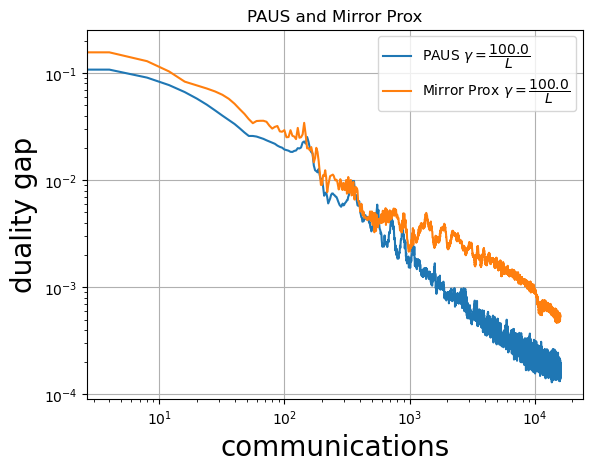

In [54]:
x = np.array(range(len(error_breg))) * iter_grad_calls
plt.title("PAUS and Mirror Prox")
plt.loglog(x, error_breg, label = r'PAUS $\gamma=\dfrac{%.1f}{L}$' %c)
plt.loglog(x, error_mp, label = r'Mirror Prox $\gamma=\dfrac{%.1f}{L}$' %c)
plt.xlabel("communications", fontsize=20)
plt.ylabel("duality gap", fontsize=20)
plt.legend()
plt.grid()
plt.show()

100%|██████████████████████████████████████| 4000/4000 [00:05<00:00, 736.22it/s]


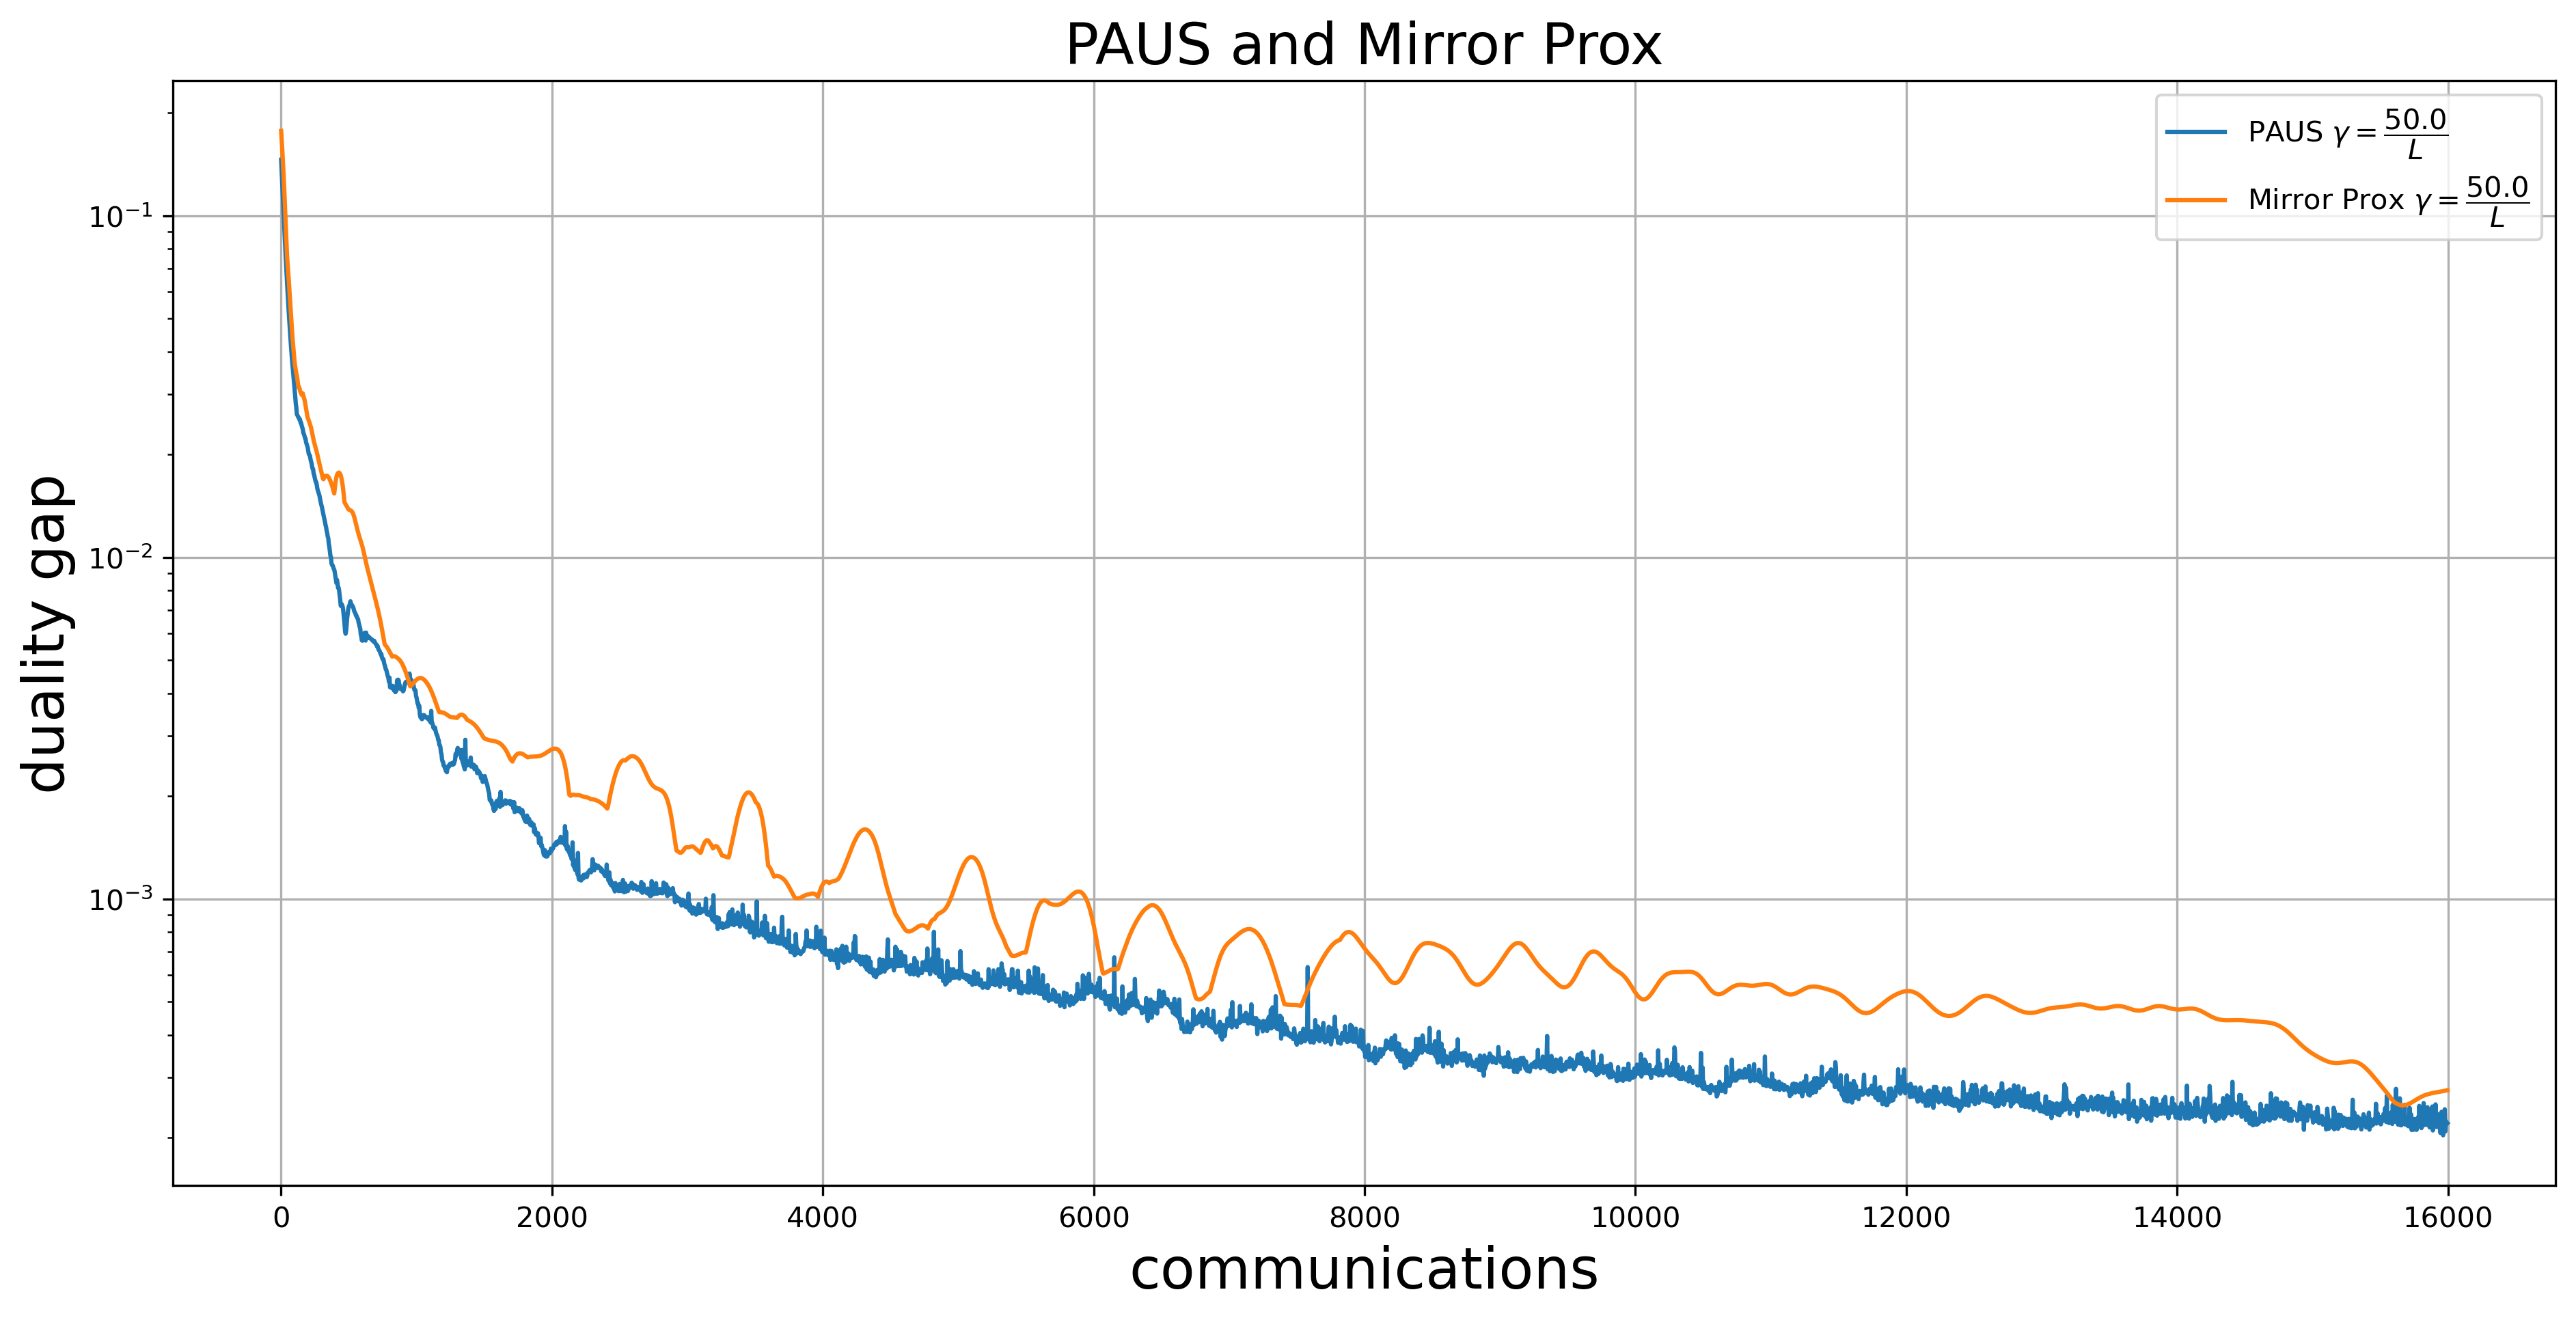

In [65]:
fig = plt.figure(figsize = (15, 7), dpi=300)
iter_grad_calls = 4
for c in [50]:
    ans_breg, error_breg = PAUS_method(grad_x, grad_y, prox_simplex, gamma_MP, c, n, Lipschitz, gamma_sim, A_1, mean_matrix)
    ans_mp, error_mp = MirrorProx(grad_x, grad_y, prox_simplex, gamma_MP, c, n, Lipschitz, mean_matrix)
    x = np.array(range(len(error_breg))) * iter_grad_calls 
    plt.plot(x, error_breg, label = r'PAUS $\gamma=\dfrac{%.1f}{L}$' %c)
    plt.plot(x, error_mp, label = r'Mirror Prox $\gamma=\dfrac{%.1f}{L}$' %c)
    continue
plt.title("PAUS and Mirror Prox", fontsize=20)
plt.xlabel("communications", fontsize=20)
plt.ylabel("duality gap", fontsize=20)
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()

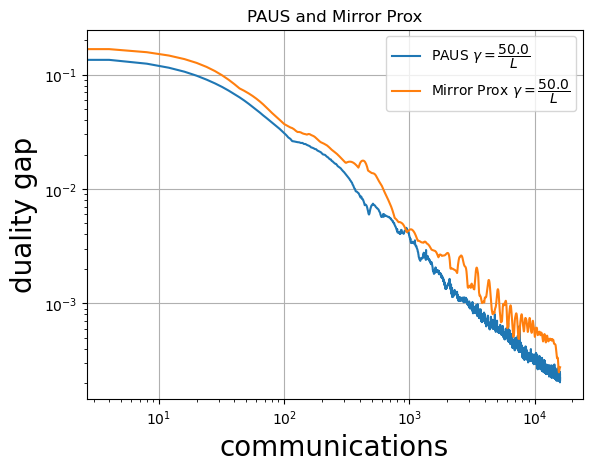

In [66]:
x = np.array(range(len(error_breg))) * iter_grad_calls
plt.title("PAUS and Mirror Prox")
plt.loglog(x, error_breg, label = r'PAUS $\gamma=\dfrac{%.1f}{L}$' %c)
plt.loglog(x, error_mp, label = r'Mirror Prox $\gamma=\dfrac{%.1f}{L}$' %c)
plt.xlabel("communications", fontsize=20)
plt.ylabel("duality gap", fontsize=20)
plt.legend()
plt.grid()
plt.show()

100%|██████████████████████████████████████| 4000/4000 [00:04<00:00, 887.22it/s]


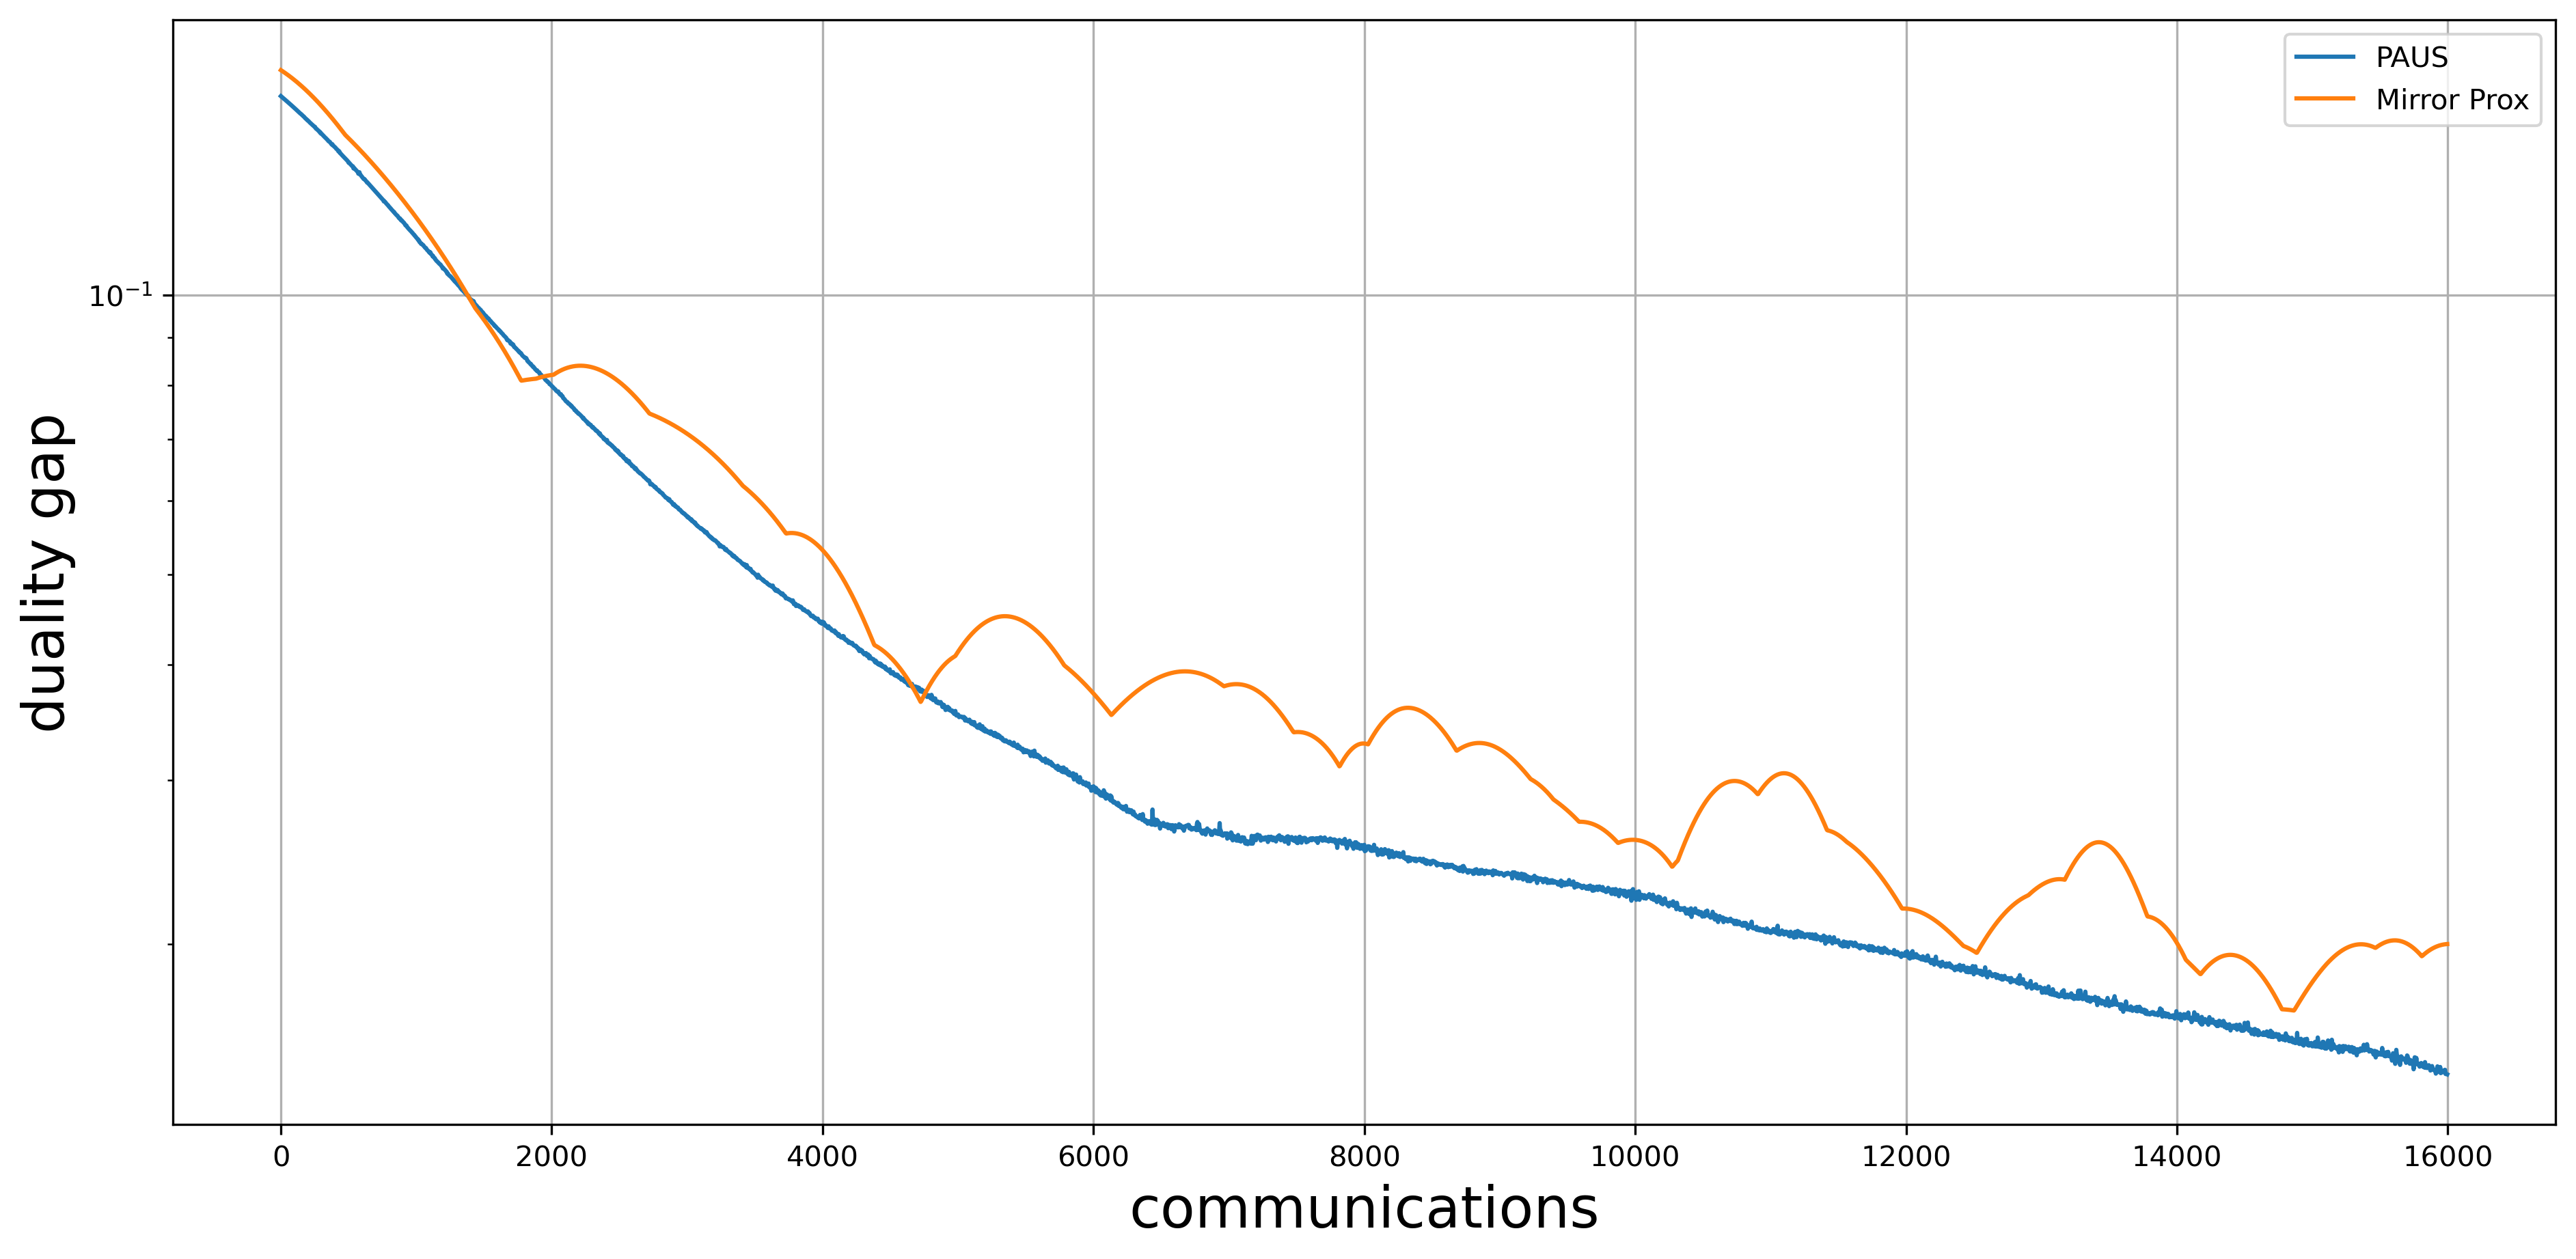

In [14]:
fig = plt.figure(figsize = (15, 7), dpi=300)
iter_grad_calls = 4
for c in [1]:
    ans_breg, error_breg = PAUS_method(grad_x, grad_y, prox_simplex, gamma_MP, c, n, Lipschitz, gamma_sim, A_1, mean_matrix)
    ans_mp, error_mp = MirrorProx(grad_x, grad_y, prox_simplex, gamma_MP, c, n, Lipschitz, mean_matrix)
    x = np.array(range(len(error_breg))) * iter_grad_calls 
    plt.plot(x, error_breg, label = r'PAUS')
    plt.plot(x, error_mp, label = r'Mirror Prox')
    continue

plt.xlabel("communications", fontsize=20)
plt.ylabel("duality gap", fontsize=20)
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()

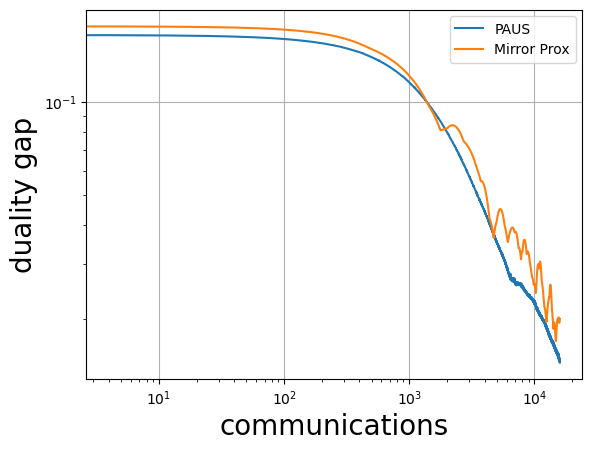

In [15]:
x = np.array(range(len(error_breg))) * iter_grad_calls
plt.loglog(x, error_breg, label = r'PAUS')
plt.loglog(x, error_mp, label = r'Mirror Prox')
plt.xlabel("communications", fontsize=20)
plt.ylabel("duality gap", fontsize=20)
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()

  0%|                                                  | 0/4000 [00:00<?, ?it/s]

100%|██████████████████████████████████████| 4000/4000 [00:04<00:00, 883.39it/s]


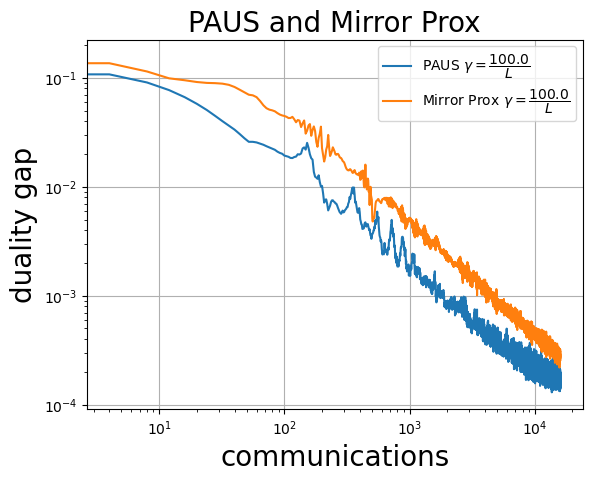

In [55]:
run_log(c_list=[100])

100%|██████████████████████████████████████| 4000/4000 [00:04<00:00, 871.64it/s]


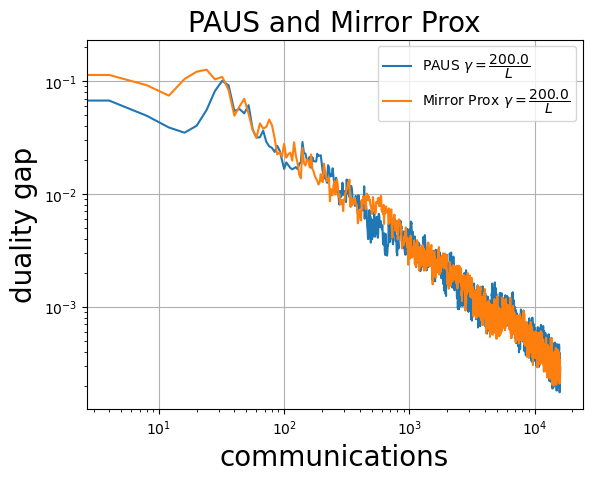

In [56]:
run_log(c_list=[200])

100%|██████████████████████████████████████| 4000/4000 [00:04<00:00, 867.06it/s]


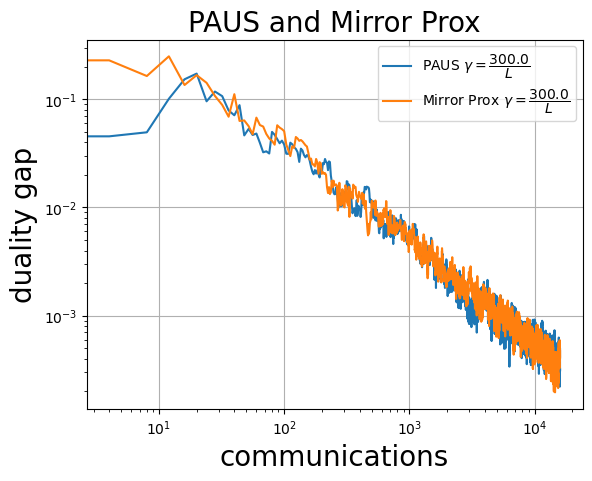

In [57]:
run_log(c_list=[300])

100%|██████████████████████████████████████| 4000/4000 [00:04<00:00, 885.22it/s]


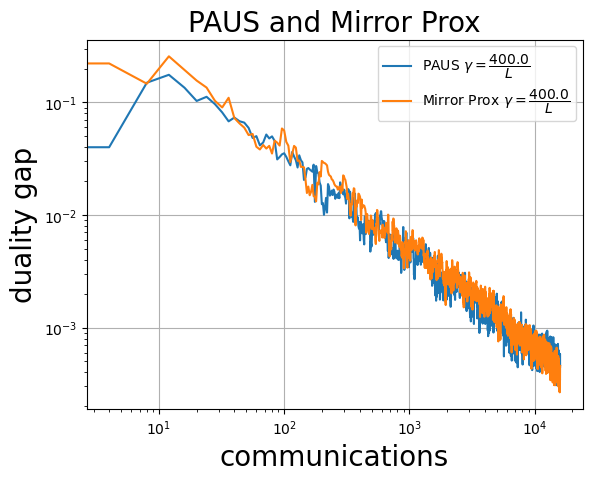

In [58]:
run_log(c_list=[400])

100%|██████████████████████████████████████| 4000/4000 [00:04<00:00, 895.91it/s]


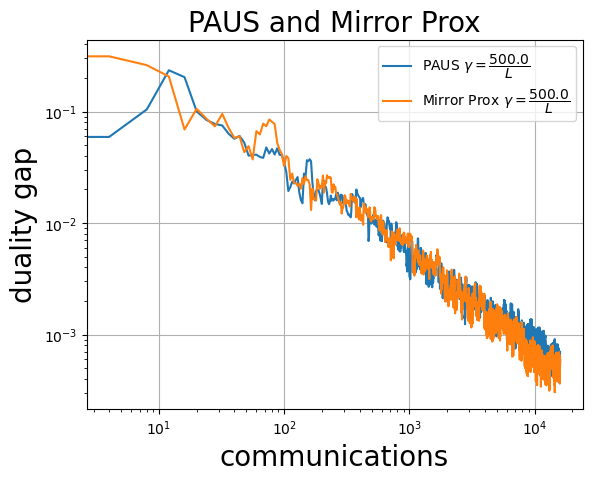

In [59]:
run_log(c_list=[500])

100%|██████████████████████████████████████| 4000/4000 [00:04<00:00, 878.00it/s]


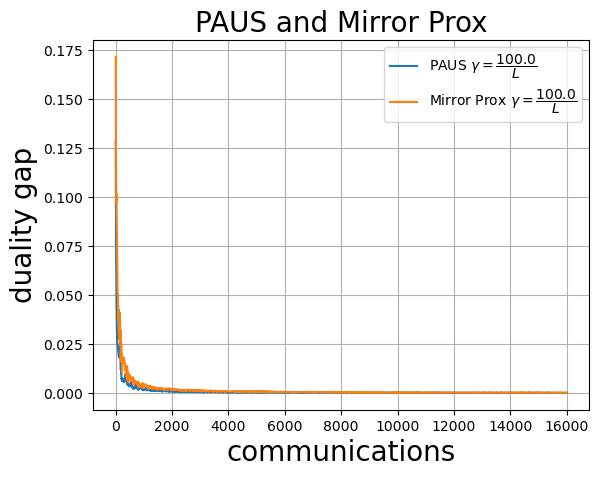

In [60]:
run(c_list=[100])

100%|██████████████████████████████████████| 4000/4000 [00:04<00:00, 871.90it/s]


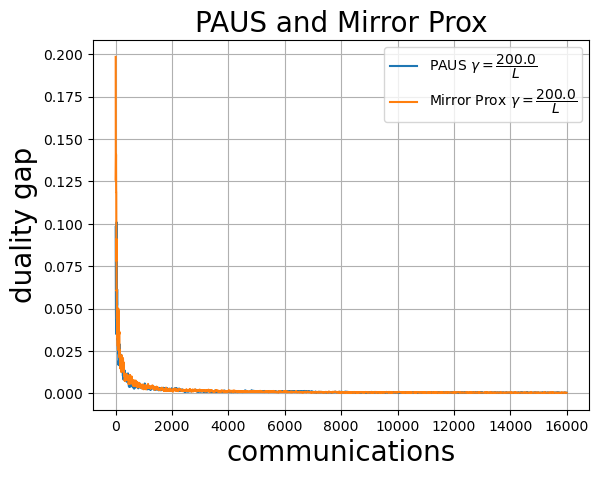

In [61]:
run(c_list=[200])

100%|██████████████████████████████████████| 4000/4000 [00:04<00:00, 892.34it/s]


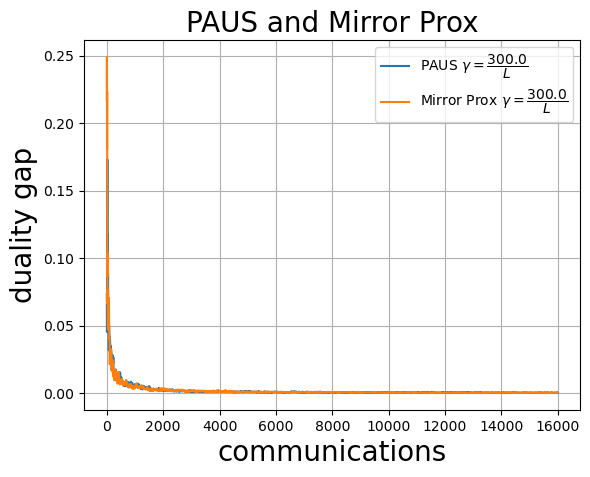

In [62]:
run(c_list=[300])

100%|██████████████████████████████████████| 4000/4000 [00:04<00:00, 895.70it/s]


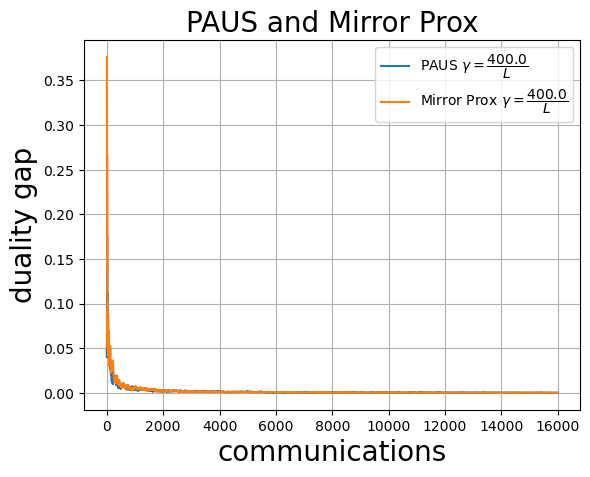

In [63]:
run(c_list=[400])

100%|██████████████████████████████████████| 4000/4000 [00:04<00:00, 836.24it/s]


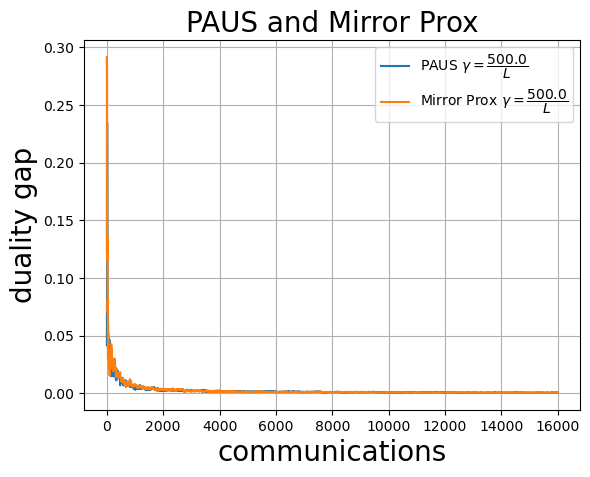

In [64]:
run(c_list=[500])

## (16, 16) matrix

In [ ]:
k = 4 # grid size
n = k * k # amount of houses
distance_matrix = get_distance_matrix(make_house_grid(k))
theta = 2 / distance_matrix.max()

matrices_array = [get_utility_matrix(distance_matrix) for _ in range(10000)]
mean_matrix = np.mean(matrices_array, axis=0)
machine_1 = matrices_array[:2000]
machine_2 = matrices_array[2000:4000]
machine_3 = matrices_array[4000:6000]
machine_4 = matrices_array[6000:8000]
machine_5 = matrices_array[8000:]
A_1 = np.mean(machine_1, axis=0)
A_2 = np.mean(machine_2, axis=0)
A_3 = np.mean(machine_3, axis=0)
A_4 = np.mean(machine_4, axis=0)
A_5 = np.mean(machine_5, axis=0)

delta = np.linalg.norm(get_hess(mean_matrix) - get_hess(A_1), ord=1)
Lipschitz = np.linalg.norm(A_1, ord=1)
gamma_sim = 1 / (2 * Lipschitz * delta) 